In [421]:
import pandas as pd

In [422]:
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [423]:
claims = pd.read_csv(r'C:\Users\rosee\Desktop\floods analysis\openFEMA_claims20190831[1].csv')
claims.to_csv('claims.csv', encoding='utf-8')
claims.tail(10)

C:\Users\rosee\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (0,11,15,22,23,31,32,37) have mixed types. Specify dtype option on import or set low_memory=False.



agriculturestructureindicator    asofdate  basefloodelevation  \
2432878                           NaN  2019-08-31               238.0   
2432879                           NaN  2019-08-31                10.0   
2432880                           NaN  2019-08-31                 NaN   
2432881                           NaN  2019-08-31                 8.0   
2432882                           NaN  2019-08-31                 8.0   
2432883                           NaN  2019-08-31                 9.0   
2432884                           NaN  2019-08-31                 9.0   
2432885                           NaN  2019-08-31                10.0   
2432886                           NaN  2019-08-31                 NaN   
2432887                           NaN  2019-08-31                 9.0   

         basementenclosurecrawlspacetype  reportedcity condominiumindicator  \
2432878                              0.0  LIBERTY HILL                    N   
2432879                              0.0         MIAMI                    N   
2432880                              0.0   COOPER CITY                    N   
2432881                              0.0         MIAMI                    N   
2432882                              0.0         MIAMI                    N   
2432883                              0.0         MIAMI                    N   
2432884                              0.0         MIAMI                    N   
2432885                              0.0     PINECREST                    N   
2432886                              0.0     PINECREST                    N   
2432887                              0.0         MIAMI                    N   

         policycount  countycode  crsdiscount  dateofloss  ...  \
2432878          1.0     45055.0         0.05  2015-12-31  ...   
2432879          1.0     12086.0         0.25  2005-08-25  ...   
2432880          1.0     12011.0         0.10  2003-06-23  ...   
2432881          1.0     12086.0         0.25  2005-08-26  ...   
2432882          1.0     12086.0         0.25  2005-08-26  ...   
2432883          1.0     12086.0         0.25  2005-08-26  ...   
2432884          1.0     12086.0         0.25  2005-08-25  ...   
2432885          1.0     12086.0         0.25  2005-06-20  ...   
2432886          1.0     12086.0         0.25  2005-08-25  ...   
2432887          1.0     12086.0         0.25  2005-08-25  ...   

        amountpaidonincreasedcostofcomplianceclaim  \
2432878                                        NaN   
2432879                                        0.0   
2432880                                        0.0   
2432881                                        0.0   
2432882                                        0.0   
2432883                                        0.0   
2432884                                        0.0   
2432885                                        0.0   
2432886                                        0.0   
2432887                                        0.0   

        postfirmconstructionindicator  ratemethod  \
2432878                             Y           1   
2432879                             Y           1   
2432880                             Y           1   
2432881                             Y           1   
2432882                             Y           1   
2432883                             Y           1   
2432884                             Y           1   
2432885                             N           1   
2432886                             N           1   
2432887                             N           1   

         smallbusinessindicatorbuilding state totalbuildinginsurancecoverage  \
2432878                             NaN    SC                       250000.0   
2432879                             NaN    FL                       156000.0   
2432880                             NaN    FL                        27200.0   
2432881                             NaN    FL                       160700.0   
2432882                     

In [424]:
claims.shape

(2432888, 39)

In [425]:
claims.dtypes
#will need to convert date of loss to datetime
#I can drop asofdate because it doesn't matter and is constant

agriculturestructureindicator                  object
asofdate                                       object
basefloodelevation                            float64
basementenclosurecrawlspacetype               float64
reportedcity                                   object
condominiumindicator                           object
policycount                                   float64
countycode                                    float64
crsdiscount                                   float64
dateofloss                                     object
elevatedbuildingindicator                      object
elevationcertificateindicator                  object
elevationdifference                           float64
censustract                                   float64
floodzone                                      object
houseworship                                   object
latitude                                      float64
locationofcontents                             object
longitude                   

In [426]:
claims['yearofloss'].value_counts().sort_values(ascending=False)

#the top ten are not very random, they are more recent years

2005    277024
2012    175789
2017    145466
2008     96972
2011     96461
1979     87375
2016     85463
1998     83621
1995     79582
2004     76033
1983     70474
1999     68191
1996     68137
1992     61551
2001     54492
1980     53227
1985     52339
1989     48696
2003     47846
1993     45979
1982     43118
2018     42429
1984     39236
1997     38162
2010     37818
2009     37733
1991     36599
1978     35897
2015     34577
2002     34512
1981     31178
2006     29651
1994     28634
2007     28360
2013     24060
2000     23255
2019     19299
1990     19266
1987     18992
1986     18863
2014     18774
1988     11949
1977      5667
1976        72
1975        45
1974        13
1973         9
1972         1
1970         1
Name: yearofloss, dtype: int64

In [427]:
claims['state'].value_counts()

LA    458785
TX    371422
FL    295451
NJ    192679
NY    169501
NC    101247
PA     73523
MS     62715
IL     51837
CA     50294
MO     50062
VA     49270
SC     45728
AL     40599
MA     34406
CT     28120
WV     27313
OH     27250
PR     25603
KY     24475
MD     23870
GA     21398
IN     18705
TN     15425
IA     14341
WA     14029
ND     13209
MI     12970
OK     12684
MN     12139
AR      9523
WI      8463
KS      7693
RI      6581
NE      6161
DE      6055
OR      5827
HI      5391
CO      5275
AZ      4946
ME      4673
NH      3985
SD      3649
VI      3537
VT      2816
MT      2103
NV      1851
NM      1372
ID      1074
UT      1060
AK       666
WY       544
DC       412
GU       159
AS        10
Name: state, dtype: int64

In [428]:
claims.describe().T

#I can't use all 2.4 million data, so I will compare these to the sample
#to ensure that my sample really is random

count          mean  \
basefloodelevation                           483589.0  7.137891e+01   
basementenclosurecrawlspacetype             2432843.0  4.672303e-01   
policycount                                 2432880.0  1.247610e+00   
countycode                                  2425385.0  3.020189e+04   
crsdiscount                                 2432880.0  3.494819e-02   
elevationdifference                         2432880.0  7.505239e+02   
censustract                                 2373588.0  3.004539e+10   
latitude                                    2379340.0  3.404449e+01   
longitude                                   2379340.0 -8.614260e+01   
lowestadjacentgrade                          350723.0  7.545709e+01   
lowestfloorelevation                         475071.0  1.482986e+02   
numberoffloorsintheinsuredbuilding          2416237.0  1.722882e+00   
occupancytype                               2432168.0  1.404049e+00   
amountpaidonbuildingclaim                   2359510.0  2.367499e+04   
amountpaidoncontentsclaim                   1712987.0  7.729023e+03   
amountpaidonincreasedcostofcomplianceclaim  1160371.0  7.600233e+02   
totalbuildinginsurancecoverage              2432880.0  1.512794e+05   
totalcontentsinsurancecoverage              2432880.0  2.819080e+04   
yearofloss                                  2432888.0  2.000633e+03   

                                                     std       min  \
basefloodelevation                          3.005833e+02  -6002.00   
basementenclosurecrawlspacetype             9.312251e-01      0.00   
policycount                                 6.239860e+00      1.00   
countycode                                  1.456152e+04   1001.00   
crsdiscount                                 6.239606e-02      0.00   
elevationdifference                         4.321235e+02  -1987.00   
censustract                                 1.445356e+10   1003.00   
latitude                                    5.801293e+00    -14.30   
longitude                                   1.111013e+01   -170.70   
lowestadjacentgrade                         5.465743e+02  -3411.00   
lowestfloorelevation                        9.801414e+02  -6002.00   
numberoffloorsintheinsuredbuilding          8.858817e-01      1.00   
occupancytype                               9.672842e-01      1.00   
amountpaidonbuildingclaim                   5.278161e+04 -29207.05   
amountpaidoncontentsclaim                   2.280169e+04  -8484.00   
amountpaidonincreasedcostofcomplianceclaim  4.441656e+03      0.00   
totalbuildinginsurancecoverage              2.777121e+06      0.00   
totalcontentsinsurancecoverage              4.809394e+04      0.00   
yearofloss                                  1.179710e+01   1970.00   

                                                     25%           50%  \
basefloodelevation                          7.000000e+00  9.000000e+00   
basementenclosurecrawlspacetype             0.000000e+00  0.000000e+00   
policycount                                 1.000000e+00  1.000000e+00   
countycode                                  2.201900e+04  2.916300e+04   
crsdiscount                                 0.000000e+00  0.000000e+00   
elevationdifference                         9.990000e+02  9.990000e+02   
censustract                                 2.201900e+10  2.912796e+10   
latitude                                    2.990000e+01  3.190000e+01   
longitude                                  -9.140000e+01 -8.750000e+01   
lowestadjacentgrade                         3.200000e+00  6.700000e+00   
lowestfloorelevation                        6.500000e+00  1.030000e+01   
numberoffloorsintheinsuredbuilding          1.000000e+00  1.000000e+00   
occupancytype                               1.000000e+00  1.000000e+00   
amountpaidonbuildingclaim                   1.085800e+02  4.818810e+03   
amountpaidoncontentsclaim                   0.000000e+00  2.290000e+02   
amountpaidonincreasedcostofcomplianceclaim

In [429]:
#I am not sure how much my computer can handle, so I am 
#gonna start on the larger side and take out 250,000 for the sample

#that was way too much, could not make bar charts. Taking it down to 100k

#still too much, 50k

In [430]:
sclaims = claims.sample(n=50000, random_state=2)

In [431]:
sclaims.shape

(50000, 39)

In [432]:
sclaims.describe().T

#comparing the mean of the sample vs original, the fluctuations seem reasonable,
#this seems like a fine sample

count          mean  \
basefloodelevation                           9954.0  6.693426e+01   
basementenclosurecrawlspacetype             50000.0  4.630600e-01   
policycount                                 50000.0  1.237160e+00   
countycode                                  49852.0  3.022208e+04   
crsdiscount                                 50000.0  3.497400e-02   
elevationdifference                         50000.0  7.491087e+02   
censustract                                 48752.0  3.008121e+10   
latitude                                    48858.0  3.401521e+01   
longitude                                   48858.0 -8.618441e+01   
lowestadjacentgrade                          7287.0  6.184479e+01   
lowestfloorelevation                         9775.0  1.352352e+02   
numberoffloorsintheinsuredbuilding          49622.0  1.719298e+00   
occupancytype                               49986.0  1.401592e+00   
amountpaidonbuildingclaim                   48464.0  2.375587e+04   
amountpaidoncontentsclaim                   35255.0  7.806635e+03   
amountpaidonincreasedcostofcomplianceclaim  23948.0  7.392635e+02   
totalbuildinginsurancecoverage              50000.0  1.473545e+05   
totalcontentsinsurancecoverage              50000.0  2.822183e+04   
yearofloss                                  50000.0  2.000665e+03   

                                                     std     min  \
basefloodelevation                          2.555495e+02    -6.0   
basementenclosurecrawlspacetype             9.300606e-01     0.0   
policycount                                 6.758085e+00     1.0   
countycode                                  1.459403e+04  1003.0   
crsdiscount                                 6.263703e-02     0.0   
elevationdifference                         4.322513e+02  -992.0   
censustract                                 1.449939e+10  1003.0   
latitude                                    5.812832e+00    13.3   
longitude                                   1.115860e+01  -159.7   
lowestadjacentgrade                         2.628471e+02  -999.9   
lowestfloorelevation                        8.685237e+02  -999.0   
numberoffloorsintheinsuredbuilding          8.873502e-01     1.0   
occupancytype                               9.632274e-01     1.0   
amountpaidonbuildingclaim                   6.315069e+04     0.0   
amountpaidoncontentsclaim                   2.355866e+04     0.0   
amountpaidonincreasedcostofcomplianceclaim  4.396947e+03     0.0   
totalbuildinginsurancecoverage              1.147051e+06     0.0   
totalcontentsinsurancecoverage              4.789206e+04     0.0   
yearofloss                                  1.180842e+01  1976.0   

                                                     25%           50%  \
basefloodelevation                          7.000000e+00  9.000000e+00   
basementenclosurecrawlspacetype             0.000000e+00  0.000000e+00   
policycount                                 1.000000e+00  1.000000e+00   
countycode                                  2.201900e+04  2.916500e+04   
crsdiscount                                 0.000000e+00  0.000000e+00   
elevationdifference                         9.900000e+01  9.990000e+02   
censustract                                 2.201900e+10  2.916503e+10   
latitude                                    2.990000e+01  3.180000e+01   
longitude                                  -9.170000e+01 -8.750000e+01   
lowestadjacentgrade                         3.400000e+00  6.700000e+00   
lowestfloorelevation                        6.500000e+00  1.030000e+01   
numberoffloorsintheinsuredbuilding          1.000000e+00  1.000000e+00   
occupancytype                               1.000000e+00  1.000000e+00   
amountpaidonbuildingclaim                   1.136400e+02  4.835795e+03   
amountpaidoncontentsclaim                   0.000000e+00  2.380000e+02   
amountpaidonincreasedcostofcomplianceclaim  0.000000e+00  0.000000e+00   
totalbuildinginsurancecoverage              3.

In [433]:
# I am choosing betweeen the following features as targets
#I cannot prove the existence of global warming here,
#but what I am trying to prove is that this dataset holds evidence of global warming,
#as flooding (and therefore FEMA claims) have been increasing in recent years

#reading FEMA website for domain knowledge

#confident
#amountpaidonbuildingclaim
#amount of $ paid for building damage after flood
#this may be the most direct way to measure worsening flooding, since there is no
#higher water mark feature

#no
#amountpaidoncontentsclaim
#amount $ paid for damage to belongings after flood
#this probably isn't a great metric since the value of belongings 
#has probably shifted a lot since the 70s

#no
#amountpaidonincreasedcostofcomplainceclaim
#this is extra $ given (up to 30k) to make improvements to the building
#in order to continue receiving flood insurance
#because the building has been severely damaged or 25% of value has been damaged 
#by flood more than twice in a decade
#I wonder if this has increased in recent years due to there being increased flood zones
#this may cause leakage if it isn't target
#won't work because it seems they have a cap

#no
#totalbuildinginsurancecoverage
#the dollar amount of insurance on the building
#this probably has increased for someone who is living near
#a rising flood zone
#conservative people may take out less than they should

#no
#totalcontentsinsurancecoverage
#dollar amount of insurance on belongings
#again this probably isn't the best measure
#conservative people may take out less than they should

#confident
#basefloodelevation
#elevation at which there is a %1 chance of flooding/year
#this may be a good way to show floodplains expanding
#but there is a ten year period that is mysteriously absent

In [434]:
sclaims['totalbuildinginsurancecoverage'].value_counts()

250000.0     8190
0.0          1538
100000.0     1403
35000.0      1182
50000.0      1115
             ... 
5100000.0       1
19200.0         1
241300.0        1
5000000.0       1
159800.0        1
Name: totalbuildinginsurancecoverage, Length: 2766, dtype: int64

In [435]:
sclaims['basefloodelevation'].describe()

count    9954.000000
mean       66.934258
std       255.549516
min        -6.000000
25%         7.000000
50%         9.000000
75%        14.000000
max      5892.000000
Name: basefloodelevation, dtype: float64

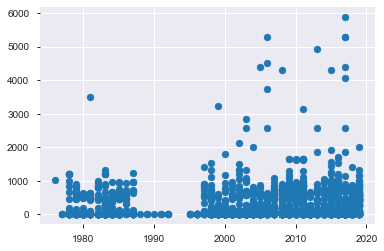

In [436]:
plt.scatter(sclaims['yearofloss'], sclaims['basefloodelevation'])

<BarContainer object of 50000 artists>

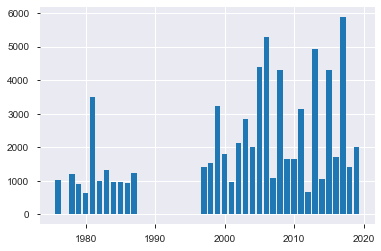

In [437]:
plt.bar(sclaims['yearofloss'], sclaims['basefloodelevation'])

<BarContainer object of 50000 artists>

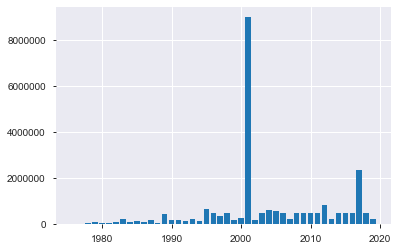

In [438]:
plt.bar(sclaims['yearofloss'], sclaims['amountpaidonbuildingclaim'])

<BarContainer object of 50000 artists>

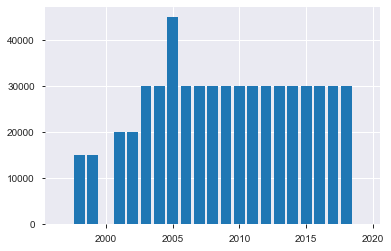

In [439]:
plt.bar(sclaims['yearofloss'], sclaims['amountpaidonincreasedcostofcomplianceclaim'])

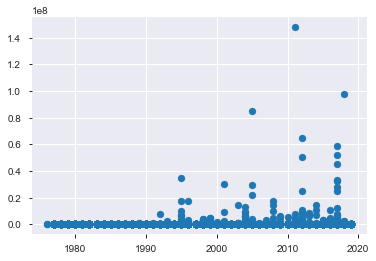

In [440]:
plt.scatter(sclaims['yearofloss'], sclaims['totalbuildinginsurancecoverage'])

In [441]:
sclaims['yearofloss'].max()

2019

In [442]:
sclaims.head(1).T

13633
agriculturestructureindicator                      NaN
asofdate                                    2019-08-31
basefloodelevation                                 NaN
basementenclosurecrawlspacetype                      0
reportedcity                                 KINGSLAND
condominiumindicator                                 N
policycount                                          1
countycode                                       48299
crsdiscount                                          0
dateofloss                                  1995-05-29
elevatedbuildingindicator                            N
elevationcertificateindicator                      NaN
elevationdifference                                999
censustract                                   4.83e+10
floodzone                                            X
houseworship                                       NaN
latitude                                          30.7
locationofcontents                                 NaN
longitude                                        -98.4
lowestadjacentgrade                                NaN
lowestfloorelevation                               NaN
numberoffloorsintheinsuredbuilding                   1
nonprofitindicator                                 NaN
obstructiontype                                     10
occupancytype                                        1
originalconstructiondate                    1990-01-01
originalnbdate                              1995-03-24
amountpaidonbuildingclaim                            0
amountpaidoncontentsclaim                          NaN
amountpaidonincreasedcostofcomplianceclaim         NaN
postfirmconstructionindicator                        N
ratemethod                                           1
smallbusinessindicatorbuilding                     NaN
state                                               TX
totalbuildinginsurancecoverage                   35000
totalcontentsinsurancecoverage                       0
yearofloss                                        1995
reportedzipcode                                  78639
primaryresidence                                   NaN

In [443]:
(sclaims['amountpaidonbuildingclaim'] == 0).value_counts()
#a good portion of my claims haven't actually been given
# $ towards repairing the building after a flood
#23.7% 
#I wonder why... did they file a claim for their belongings instead?
#maybe they filed a claim and it was rejected

False    38112
True     11888
Name: amountpaidonbuildingclaim, dtype: int64

In [444]:
59347/250000

0.237388

In [445]:
(sclaims['amountpaidoncontentsclaim'] == 0).value_counts()
#even more didn't file for contents
#33.7%

False    33165
True     16835
Name: amountpaidoncontentsclaim, dtype: int64

In [446]:
84276/250000

0.337104

In [447]:
#lets take a look
!pip install pandas-profiling==2.*

import pandas_profiling

profile_report = sclaims.profile_report(
    check_correlation_pearson=False,
    correlations={
        'pearson': False,
        'spearman': False,
        'kendall': False,
        'phi_k': False,
        'cramers': False,
        'recoded': False,
    },
    plot={'histogram': {'bayesian_blocks_bins': False}},
)

profile_report

In [448]:
#for these I am referencing the instructions and metadata excel file that gives
#a description of each feature, and/or looking at the FEMA website

#agriculturalstructureindicator has so many 0s because 0 means not ag building
#probably drop
#amountpaidonbuildings claim is real fucked up, I need to figure that out
#amountpaidoncontentsclaim same story
#amountpaidonincreasedcostofcomplianceclaim these 0s are probably just people who didn't use this
#asofdate drop this
#basefloodelevation these 0s are valid and should not be removed
#basementenclosurecrawlspacetype 0 means no crawlspace
#censustract not sure why these are missing, probably newer stuff that wasn't on the last census
#condominiumindicator there shouldn't be 0s here
#crsdiscount 0s mean no discount
#dateofloss needs datetime
#elevatedbuildingindicator shoud not have 0s
#elevationcertificateindicatorjust says whether or not elevation has been certified, unnecessary
#elevationdifference these 0s are fine
#floodzone def should keep all these categoricals
#houseofworship is useless and should be dropped
#latitude and longitude should not have 0s, these rows should be dropped
#locationofcontents is not gonna help the model, but the 0s are fine. prob should drop
#lowestadjacentgade the 0s probably mean this data wasn't collected, should drop
#lowestfloorelevation should be skewed, shouldn't have missing values.
#nonprofitindicator should be dropped
#obstructiontype is useless for my model, should drop
##original construction date is probably not useful for model
#originalnbdate needs datetime
#policycount the skew makes sense as most people insure one residence
#postfirmconstructionindicator is probably useless, should drop
#primaryresidence shouldn't have so many zeros, is useless, should drop
#ratemethod should impute values, may be useful
#reportedcity as useful as this is, it will take a lot of work to turn this into something I can use,
#should drop it for now
#reportedzipcode should drop
#reportedstate keep and encode 
#smallbusinessindicator is useless, should drop
#totalbuildinginsurancecoverage wonder why people wouldn't get building ins, maybe just contents? 
#maybe they are incomplete or cancelled accounts
#totalcontentsinsurancecoverage these 0s mean they didn't ensure their stuff

In [449]:
#dateofloss to datetime

sclaims['dateofloss'] = pd.to_datetime(sclaims['dateofloss'])

In [450]:
begin_cutoff = pd.to_datetime('01-01-1988')
end_cutoff = pd.to_datetime('12-31-1996')

In [451]:
#I wanted to see if there was any other differences for these years
#I really wanted to use this as my target but I don't think that loosing 8 years of data is worth it
#I will try calling them tomorrow and just continue cleaning data today 
basefloodelevation_gap = (sclaims.dateofloss >= begin_cutoff) & (sclaims.dateofloss <= end_cutoff)

In [452]:
basefloodelevation_gap = sclaims.loc[basefloodelevation_gap]

In [453]:
sclaims.describe().T

count          mean  \
basefloodelevation                           9954.0  6.693426e+01   
basementenclosurecrawlspacetype             50000.0  4.630600e-01   
policycount                                 50000.0  1.237160e+00   
countycode                                  49852.0  3.022208e+04   
crsdiscount                                 50000.0  3.497400e-02   
elevationdifference                         50000.0  7.491087e+02   
censustract                                 48752.0  3.008121e+10   
latitude                                    48858.0  3.401521e+01   
longitude                                   48858.0 -8.618441e+01   
lowestadjacentgrade                          7287.0  6.184479e+01   
lowestfloorelevation                         9775.0  1.352352e+02   
numberoffloorsintheinsuredbuilding          49622.0  1.719298e+00   
occupancytype                               49986.0  1.401592e+00   
amountpaidonbuildingclaim                   48464.0  2.375587e+04   
amountpaidoncontentsclaim                   35255.0  7.806635e+03   
amountpaidonincreasedcostofcomplianceclaim  23948.0  7.392635e+02   
totalbuildinginsurancecoverage              50000.0  1.473545e+05   
totalcontentsinsurancecoverage              50000.0  2.822183e+04   
yearofloss                                  50000.0  2.000665e+03   

                                                     std     min  \
basefloodelevation                          2.555495e+02    -6.0   
basementenclosurecrawlspacetype             9.300606e-01     0.0   
policycount                                 6.758085e+00     1.0   
countycode                                  1.459403e+04  1003.0   
crsdiscount                                 6.263703e-02     0.0   
elevationdifference                         4.322513e+02  -992.0   
censustract                                 1.449939e+10  1003.0   
latitude                                    5.812832e+00    13.3   
longitude                                   1.115860e+01  -159.7   
lowestadjacentgrade                         2.628471e+02  -999.9   
lowestfloorelevation                        8.685237e+02  -999.0   
numberoffloorsintheinsuredbuilding          8.873502e-01     1.0   
occupancytype                               9.632274e-01     1.0   
amountpaidonbuildingclaim                   6.315069e+04     0.0   
amountpaidoncontentsclaim                   2.355866e+04     0.0   
amountpaidonincreasedcostofcomplianceclaim  4.396947e+03     0.0   
totalbuildinginsurancecoverage              1.147051e+06     0.0   
totalcontentsinsurancecoverage              4.789206e+04     0.0   
yearofloss                                  1.180842e+01  1976.0   

                                                     25%           50%  \
basefloodelevation                          7.000000e+00  9.000000e+00   
basementenclosurecrawlspacetype             0.000000e+00  0.000000e+00   
policycount                                 1.000000e+00  1.000000e+00   
countycode                                  2.201900e+04  2.916500e+04   
crsdiscount                                 0.000000e+00  0.000000e+00   
elevationdifference                         9.900000e+01  9.990000e+02   
censustract                                 2.201900e+10  2.916503e+10   
latitude                                    2.990000e+01  3.180000e+01   
longitude                                  -9.170000e+01 -8.750000e+01   
lowestadjacentgrade                         3.400000e+00  6.700000e+00   
lowestfloorelevation                        6.500000e+00  1.030000e+01   
numberoffloorsintheinsuredbuilding          1.000000e+00  1.000000e+00   
occupancytype                               1.000000e+00  1.000000e+00   
amountpaidonbuildingclaim                   1.136400e+02  4.835795e+03   
amountpaidoncontentsclaim                   0.000000e+00  2.380000e+02   
amountpaidonincreasedcostofcomplianceclaim  0.000000e+00  0.000000e+00   
totalbuildinginsurancecoverage              3.

In [454]:
basefloodelevation_gap.describe().T

count          mean  \
basefloodelevation                            35.0  8.128571e+00   
basementenclosurecrawlspacetype             8130.0  2.677737e-01   
policycount                                 8130.0  1.207872e+00   
countycode                                  8128.0  2.876616e+04   
crsdiscount                                 8130.0  1.498155e-02   
elevationdifference                         8130.0  7.945920e+02   
censustract                                 8033.0  2.861743e+10   
latitude                                    8045.0  3.430874e+01   
longitude                                   8045.0 -8.610065e+01   
lowestadjacentgrade                            2.0  5.900000e+00   
lowestfloorelevation                          35.0  1.041714e+01   
numberoffloorsintheinsuredbuilding          8130.0  1.661501e+00   
occupancytype                               8130.0  1.396433e+00   
amountpaidonbuildingclaim                   7880.0  1.015120e+04   
amountpaidoncontentsclaim                   5506.0  4.104344e+03   
amountpaidonincreasedcostofcomplianceclaim     0.0           NaN   
totalbuildinginsurancecoverage              8130.0  9.225185e+04   
totalcontentsinsurancecoverage              8130.0  1.605723e+04   
yearofloss                                  8130.0  1.992844e+03   

                                                     std      min  \
basefloodelevation                          5.165415e+00     -2.0   
basementenclosurecrawlspacetype             6.276188e-01      0.0   
policycount                                 5.441699e+00      1.0   
countycode                                  1.433410e+04   1003.0   
crsdiscount                                 2.977185e-02      0.0   
elevationdifference                         4.028272e+02   -992.0   
censustract                                 1.429484e+10  12029.0   
latitude                                    5.716980e+00     13.4   
longitude                                   1.298787e+01   -159.6   
lowestadjacentgrade                         8.343860e+00      0.0   
lowestfloorelevation                        7.236610e+00     -1.7   
numberoffloorsintheinsuredbuilding          8.482069e-01      1.0   
occupancytype                               9.041461e-01      1.0   
amountpaidonbuildingclaim                   2.426852e+04      0.0   
amountpaidoncontentsclaim                   1.260298e+04      0.0   
amountpaidonincreasedcostofcomplianceclaim           NaN      NaN   
totalbuildinginsurancecoverage              5.116543e+05      0.0   
totalcontentsinsurancecoverage              2.822483e+04      0.0   
yearofloss                                  2.458386e+00   1988.0   

                                                     25%           50%  \
basefloodelevation                          6.250000e+00  9.000000e+00   
basementenclosurecrawlspacetype             0.000000e+00  0.000000e+00   
policycount                                 1.000000e+00  1.000000e+00   
countycode                                  1.719700e+04  2.611800e+04   
crsdiscount                                 0.000000e+00  0.000000e+00   
elevationdifference                         9.990000e+02  9.990000e+02   
censustract                                 1.716350e+10  2.502517e+10   
latitude                                    3.000000e+01  3.350000e+01   
longitude                                  -9.050000e+01 -8.410000e+01   
lowestadjacentgrade                         2.950000e+00  5.900000e+00   
lowestfloorelevation                        5.200000e+00  1.270000e+01   
numberoffloorsintheinsuredbuilding          1.000000e+00  1.000000e+00   
occupancytype                               1.000000e+00  1.000000e+00   
amountpaidonbuildingclaim                   0.000000e+00  3.132680e+03   
amountpaidoncontentsclaim                   0.000000e+00  8.130000e+01   
amountpaidonincreasedcostofcomplianceclaim           NaN           NaN   
totalbuildinginsurancecoverage              3

In [455]:
sclaims['amountpaidonbuildingclaim'].isnull().value_counts()

False    48464
True      1536
Name: amountpaidonbuildingclaim, dtype: int64

In [456]:
(sclaims['amountpaidonbuildingclaim'] == 0).value_counts()
#why are so many of them not given any money?
#I will see if there is a trend of them receiving other claims instead

False    38112
True     11888
Name: amountpaidonbuildingclaim, dtype: int64

In [457]:
noclaim = sclaims['amountpaidonbuildingclaim'] == 0
noclaim = sclaims.loc[noclaim]

In [458]:
sclaims.describe()

basefloodelevation  basementenclosurecrawlspacetype   policycount  \
count         9954.000000                     50000.000000  50000.000000   
mean            66.934258                         0.463060      1.237160   
std            255.549516                         0.930061      6.758085   
min             -6.000000                         0.000000      1.000000   
25%              7.000000                         0.000000      1.000000   
50%              9.000000                         0.000000      1.000000   
75%             14.000000                         0.000000      1.000000   
max           5892.000000                         4.000000    593.000000   

         countycode   crsdiscount  elevationdifference   censustract  \
count  49852.000000  50000.000000         50000.000000  4.875200e+04   
mean   30222.078011      0.034974           749.108660  3.008121e+10   
std    14594.034624      0.062637           432.251306  1.449939e+10   
min     1003.000000      0.000000          -992.000000  1.003000e+03   
25%    22019.000000      0.000000            99.000000  2.201900e+10   
50%    29165.000000      0.000000           999.000000  2.916503e+10   
75%    42075.000000      0.050000           999.000000  4.205997e+10   
max    78030.000000      0.400000           999.000000  7.803096e+10   

           latitude     longitude  lowestadjacentgrade  lowestfloorelevation  \
count  48858.000000  48858.000000          7287.000000           9775.000000   
mean      34.015211    -86.184414            61.844792            135.235192   
std        5.812832     11.158604           262.847134            868.523659   
min       13.300000   -159.700000          -999.900000           -999.000000   
25%       29.900000    -91.700000             3.400000              6.500000   
50%       31.800000    -87.500000             6.700000             10.300000   
75%       39.900000    -76.900000            13.100000             18.000000   
max       64.800000    144.800000          5889.800000           9997.000000   

       numberoffloorsintheinsuredbuilding  occupancytype  \
count                        49622.000000   49986.000000   
mean                             1.719298       1.401592   
std                              0.887350       0.963227   
min                              1.000000       1.000000   
25%                              1.000000       1.000000   
50%                              1.000000       1.000000   
75%                              2.000000       1.000000   
max                              6.000000       6.000000   

       amountpaidonbuildingclaim  amountpaidoncontentsclaim  \
count               4.846400e+04               35255.000000   
mean                2.375587e+04                7806.635278   
std                 6.315069e+04               23558.661990   
min                 0.000000e+00                   0.000000   
25%                 1.136400e+02                   0.000000   
50%                 4.835795e+03                 238.000000   
75%                 2.419752e+04                5733.270000   
max                 8.973270e+06              750000.000000   

       amountpaidonincreasedcostofcomplianceclaim  \
count                                23948.000000   
mean                                   739.263470   
std                                   4396.946557   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                  45000.000000   

       totalbuildinginsurancecoverage  totalcontentsinsurancecoverage  \
count                    5.000000e+04                    50000.000000   
mean                     1.473545e+05                    28221.826000   
std                      1.147051e+06                    47892.060365   
min                      0.000000e+00                        0.000000   


In [459]:
noclaim.describe()
#this group with no building claim has a very very
#low mean of contents claim
#and cost of compliance
#they have similar means of insurance coverage for building and contents
#perhaps they had insurance and filed for their belongings since they already 
#had insurance, and just didn't claim anything for their building

basefloodelevation  basementenclosurecrawlspacetype   policycount  \
count         2688.000000                     11888.000000  11888.000000   
mean            62.894717                         0.419667      1.354896   
std            284.014808                         0.886666      9.014461   
min             -4.000000                         0.000000      1.000000   
25%              7.000000                         0.000000      1.000000   
50%              9.000000                         0.000000      1.000000   
75%             13.000000                         0.000000      1.000000   
max           5892.000000                         4.000000    562.000000   

         countycode   crsdiscount  elevationdifference   censustract  \
count  11866.000000  11888.000000         11888.000000  1.157700e+04   
mean   28345.620428      0.036713           701.588577  2.813293e+10   
std    15312.509392      0.064265           456.199972  1.513092e+10   
min     1003.000000      0.000000           -54.000000  1.097000e+03   
25%    12127.000000      0.000000             4.000000  1.211500e+10   
50%    23031.000000      0.000000           999.000000  2.211395e+10   
75%    39104.500000      0.050000           999.000000  3.906300e+10   
max    78030.000000      0.350000           999.000000  7.803096e+10   

           latitude     longitude  lowestadjacentgrade  lowestfloorelevation  \
count  11606.000000  11606.000000          1874.000000           2627.000000   
mean      33.163191    -86.437929            65.206884             96.917777   
std        5.961698     11.602553           306.496945            646.545344   
min       17.700000   -159.700000            -7.300000            -40.600000   
25%       29.600000    -90.700000             3.300000              7.000000   
50%       30.400000    -85.700000             6.950000             10.500000   
75%       39.000000    -79.000000            11.675000             16.700000   
max       64.800000    -64.600000          5889.800000           9997.000000   

       numberoffloorsintheinsuredbuilding  occupancytype  \
count                        11719.000000   11886.000000   
mean                             1.712859       1.404425   
std                              0.881471       0.967583   
min                              1.000000       1.000000   
25%                              1.000000       1.000000   
50%                              1.000000       1.000000   
75%                              2.000000       1.000000   
max                              6.000000       6.000000   

       amountpaidonbuildingclaim  amountpaidoncontentsclaim  \
count                    11888.0                8315.000000   
mean                         0.0                 564.920192   
std                          0.0                4555.120873   
min                          0.0                   0.000000   
25%                          0.0                   0.000000   
50%                          0.0                   0.000000   
75%                          0.0                   0.000000   
max                          0.0              300000.000000   

       amountpaidonincreasedcostofcomplianceclaim  \
count                                  607.000000   
mean                                   323.850939   
std                                   2755.423384   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                  30000.000000   

       totalbuildinginsurancecoverage  totalcontentsinsurancecoverage  \
count                    1.188800e+04                    11888.000000   
mean                     1.621385e+05                    29979.020861   
std                      1.289873e+06                    50876.876410   
min                      1.000000e+02                        0.000000   


In [460]:
sclaims.columns

Index(['agriculturestructureindicator', 'asofdate', 'basefloodelevation',
       'basementenclosurecrawlspacetype', 'reportedcity',
       'condominiumindicator', 'policycount', 'countycode', 'crsdiscount',
       'dateofloss', 'elevatedbuildingindicator',
       'elevationcertificateindicator', 'elevationdifference', 'censustract',
       'floodzone', 'houseworship', 'latitude', 'locationofcontents',
       'longitude', 'lowestadjacentgrade', 'lowestfloorelevation',
       'numberoffloorsintheinsuredbuilding', 'nonprofitindicator',
       'obstructiontype', 'occupancytype', 'originalconstructiondate',
       'originalnbdate', 'amountpaidonbuildingclaim',
       'amountpaidoncontentsclaim',
       'amountpaidonincreasedcostofcomplianceclaim',
       'postfirmconstructionindicator', 'ratemethod',
       'smallbusinessindicatorbuilding', 'state',
       'totalbuildinginsurancecoverage', 'totalcontentsinsurancecoverage',
       'yearofloss', 'reportedzipcode', 'primaryresidence'],
      d

In [461]:
#TIME TO CLEAN

#agriculturalstructureindicator has so many 0s because 0 means not ag building
#probably drop 
#amountpaidonincreasedcostofcomplianceclaim these 0s are probably just people who didn't use this
#basementenclosurecrawlspacetype 0 means no crawlspace
#censustract not sure why these are missing, probably newer stuff that wasn't on the last census
#condominiumindicator there shouldn't be 0s here
#crsdiscount 0s mean no discount
#elevatedbuildingindicator shoud not have 0s
#elevationdifference these 0s are fine
#floodzone def should keep all these categoricals
#latitude and longitude should not have 0s, these rows should be dropped
#locationofcontents is not gonna help the model, but the 0s are fine. prob should drop
#obstructiontype is useless for my model, should drop
##original construction date is probably not useful for model
#originalnbdate needs datetime
#policycount the skew makes sense as most people insure one residence
#ratemethod should impute values, may be useful
#reportedstate keep and encode 
#totalbuildinginsurancecoverage wonder why people wouldn't get building ins, maybe just contents? 
#maybe they are incomplete or cancelled accounts
#totalcontentsinsurancecoverage these 0s mean they didn't ensure their stuff

In [462]:
sclaims.shape

(50000, 39)

In [463]:
columns = ['asofdate', 'elevationcertificateindicator', 'houseworship', 'lowestadjacentgrade',
          'lowestfloorelevation', 'nonprofitindicator', 'postfirmconstructionindicator',
          'primaryresidence', 'reportedzipcode', 'reportedcity', 'smallbusinessindicatorbuilding',
          'agriculturestructureindicator']
sclaims.drop(columns, axis=1, inplace=True)

In [464]:
sclaims.shape

(50000, 27)

In [465]:
#needs datetime
#'originalnbdate'

sclaims['originalnbdate'] = pd.to_datetime(sclaims['originalnbdate'])

In [466]:
sclaims.dtypes

basefloodelevation                                   float64
basementenclosurecrawlspacetype                      float64
condominiumindicator                                  object
policycount                                          float64
countycode                                           float64
crsdiscount                                          float64
dateofloss                                    datetime64[ns]
elevatedbuildingindicator                             object
elevationdifference                                  float64
censustract                                          float64
floodzone                                             object
latitude                                             float64
locationofcontents                                    object
longitude                                            float64
numberoffloorsintheinsuredbuilding                   float64
obstructiontype                                       object
occupancytype           

In [467]:
sclaims.shape

(50000, 27)

In [468]:
#latitude and longitude should not have 0s, these rows should be dropped

sclaims['latitude'] = sclaims['latitude'].replace(0, np.NaN)
(sclaims['latitude'] == 0).value_counts()

sclaims['longitude'] = sclaims['longitude'].replace(0, np.NaN)
(sclaims['longitude'] == 0).value_counts()

False    50000
Name: longitude, dtype: int64

In [469]:
sclaims.shape

(50000, 27)

In [470]:
#dropping all rows with the target missing

sclaims['amountpaidonbuildingclaim'].replace(['NaN', 'NaT', 0], np.nan, inplace=True)

In [471]:
sclaims['amountpaidonbuildingclaim'] = sclaims['amountpaidonbuildingclaim'].dropna(how='any', axis=0)

In [472]:
sclaims = sclaims.dropna(subset=['amountpaidonbuildingclaim'])

In [473]:
(sclaims['amountpaidonbuildingclaim']==0).value_counts()

False    36576
Name: amountpaidonbuildingclaim, dtype: int64

In [474]:
sclaims['amountpaidonbuildingclaim'].isnull().value_counts()

False    36576
Name: amountpaidonbuildingclaim, dtype: int64

In [475]:
print(sclaims.shape)
sclaims.head(5)


(36576, 27)


basefloodelevation  basementenclosurecrawlspacetype  \
1420041                 NaN                              0.0   
2051067                 NaN                              0.0   
686440                  NaN                              2.0   
98630                   NaN                              0.0   
276225                 64.4                              0.0   

        condominiumindicator  policycount  countycode  crsdiscount dateofloss  \
1420041                    N          1.0     22089.0         0.05 1995-05-08   
2051067                    N          1.0     22055.0         0.00 1980-05-16   
686440                     N          1.0     34031.0         0.05 1999-09-16   
98630                      N          1.0     22071.0         0.10 2005-08-29   
276225                     N          1.0     22033.0         0.20 2016-08-13   

        elevatedbuildingindicator  elevationdifference   censustract  ...  \
1420041                         N                  0.0  2.208906e+10  ...   
2051067                         N                999.0  2.205500e+10  ...   
686440                          N                999.0  3.403125e+10  ...   
98630                           N                999.0  2.207101e+10  ...   
276225                          N                  0.0  2.203300e+10  ...   

        originalconstructiondate  originalnbdate amountpaidonbuildingclaim  \
1420041               1986-10-01      1988-05-13                  12019.07   
2051067                      NaN      1980-05-06                   7190.37   
686440                1961-07-01      1992-04-06                   3692.50   
98630                 1930-01-01      2004-11-12                 250000.00   
276225                1993-05-17      2010-07-23                  48407.82   

         amountpaidoncontentsclaim  \
1420041                    7408.21   
2051067                       0.00   
686440                     5802.19   
98630                    100000.00   
276225                         NaN   

         amountpaidonincreasedcostofcomplianceclaim ratemethod  state  \
1420041                                         NaN          1     LA   
2051067                                         NaN          1     LA   
686440                                          0.0          1     NJ   
98630                                           0.0          1     LA   
276225                                          0.0          1     LA   

        totalbuildinginsurancecoverage totalcontentsinsurancecoverage  \
1420041                       118300.0                        60000.0   
2051067                        10000.0                         5000.0   
686440                         92000.0                        20000.0   
98630                         250000.0                       100000.0   
276225                        112200.0                            0.0   

         yearofloss  
1420041        1995  
2051067        1980  
686440         1999  
98630          2005  
276225         2016  

[5 rows x 27 columns]

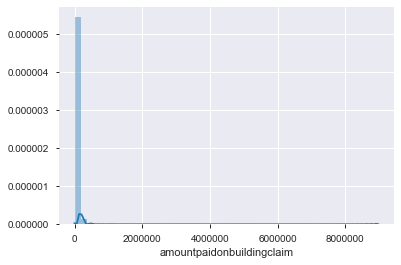

In [476]:
#the target is very right skewed

sns.distplot(sclaims['amountpaidonbuildingclaim'])

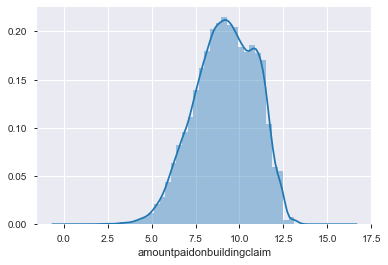

In [477]:
buildingclaim_log = np.log1p(sclaims['amountpaidonbuildingclaim'])
sclaims['amountpaidonbuildingclaim'] = buildingclaim_log
sns.distplot(sclaims['amountpaidonbuildingclaim'])

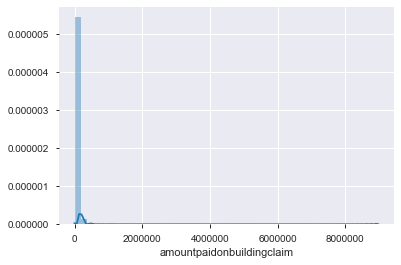

In [490]:
#sns.distplot(np.expm1(buildingclaim_log))
#leaving this here for later,
#how to reverse the log transform to interpret the results

In [566]:
np.expm1(mean)

9801.931777760898

In [486]:
sclaims['basefloodelevation'].max()

5287.5

In [478]:
sclaims.dtypes

basefloodelevation                                   float64
basementenclosurecrawlspacetype                      float64
condominiumindicator                                  object
policycount                                          float64
countycode                                           float64
crsdiscount                                          float64
dateofloss                                    datetime64[ns]
elevatedbuildingindicator                             object
elevationdifference                                  float64
censustract                                          float64
floodzone                                             object
latitude                                             float64
locationofcontents                                    object
longitude                                            float64
numberoffloorsintheinsuredbuilding                   float64
obstructiontype                                       object
occupancytype           

In [479]:
sclaims['amountpaidonbuildingclaim'].max()

16.00976083979902

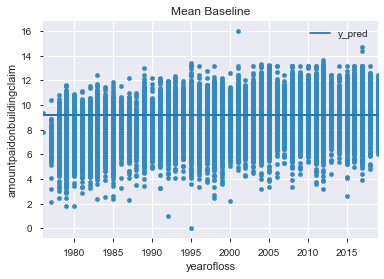

In [516]:
#Initial baseline

plot = sclaims.plot.scatter('yearofloss', 'amountpaidonbuildingclaim')

mean = sclaims['amountpaidonbuildingclaim'].mean()
sclaims['y_pred'] = mean
title = 'Mean Baseline'

sclaims.plot('yearofloss', 'y_pred', ax=plot, title=title)

In [565]:
mean

9.190436780914945

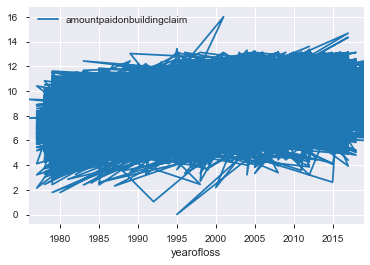

In [521]:
sclaims.plot('yearofloss', 'amountpaidonbuildingclaim')

In [481]:
#Before I remove the rest of the columns I suspect aren't useful, I want to make a baseline
#model to compare against after they are removed

#since it is easy and I suspect the relationship is non-monotonic but leaning towards
#a linear relationship with a lot of outliers, I will start with ridge regression

from sklearn.model_selection import train_test_split

train, test = train_test_split(sclaims, test_size= .2, random_state=42)
train, val = train_test_split(train, test_size= .3, random_state=42)
test.shape, train.shape, val.shape

target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

((20482, 25), (8778, 25), (7316,))

In [482]:
#before dropped columns

import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=alphas, normalize=True )
    )

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.3767552591782787
Val score: 0.3677130331011964


In [483]:
coefficients = (pipeline.named_steps['ridgecv'].coef_)
sig = pd.Series(coefficients, features)
sig

basefloodelevation                           -0.066591
basementenclosurecrawlspacetype              -0.062173
condominiumindicator                          0.027354
policycount                                  -0.004724
countycode                                   -0.154942
crsdiscount                                   0.046854
elevatedbuildingindicator                    -0.077565
elevationdifference                           0.018383
censustract                                   0.129745
floodzone                                     0.023207
latitude                                     -0.040834
locationofcontents                           -0.036197
longitude                                    -0.066111
numberoffloorsintheinsuredbuilding           -0.048200
obstructiontype                              -0.021643
occupancytype                                 0.073333
originalconstructiondate                      0.000407
amountpaidoncontentsclaim                     0.648964
amountpaid

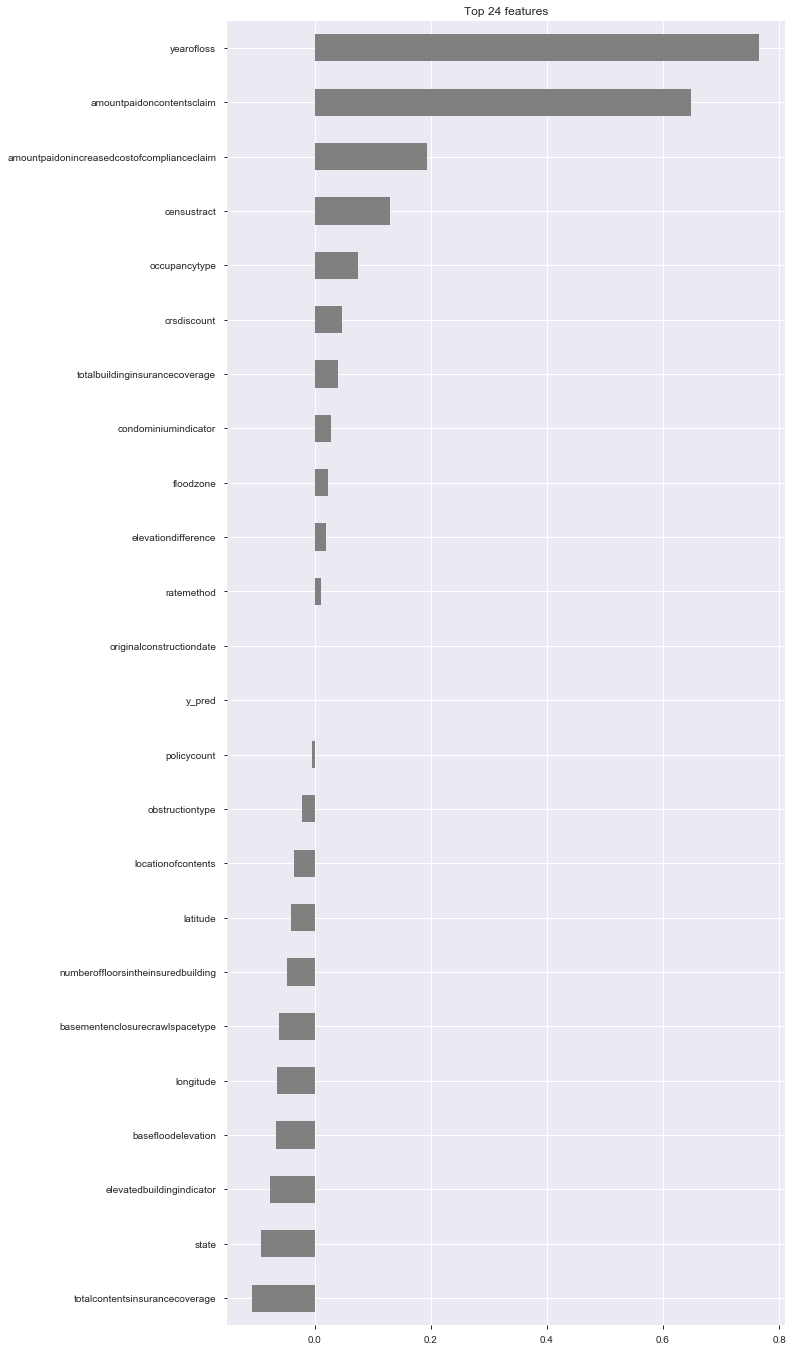

In [484]:
pipe = pipeline.named_steps['ridgecv'].coef_
importances = pd.Series(pipe, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,24))
plt.title(f'Top 24 features')
importances.sort_values()[-24:].plot.barh(color='grey')

#yearofloss in this model has the most influence, possibly supporting
#my hypothesis. it could also be overfitting to specific years with major natural disasters

#I wonder if total building insurance coverage is causing leakage. This may not be a good target,
#I may need to go back and choose the basefloodelevation

In [485]:
#better baseline

from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.9404648575178143
Val score: 0.5666429890004834


In [ ]:
importances = pd.Series(rf.feature_importances_, encoded.columns)

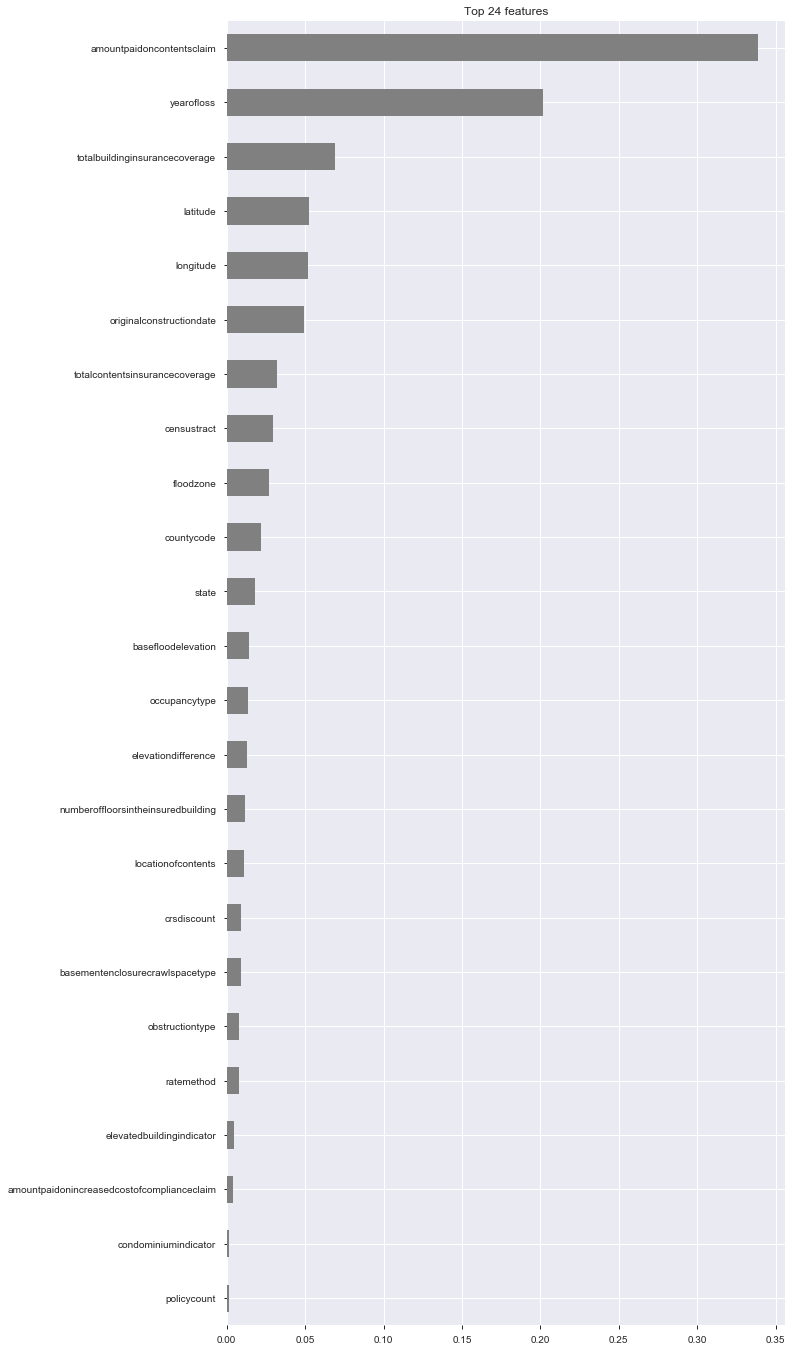

In [498]:
pipe = pipeline.named_steps['randomforestregressor']
importances = pd.Series(pipe.feature_importances_, X_train.columns)

plt.figure(figsize=(10,24))
plt.title(f'Top 24 features')
importances.sort_values()[-24:].plot.barh(color='grey')

In [499]:
#new day
#I think that the amountpaidoncontents is causing leakage, because if there is a lot
#paid on the building then there super likely damage to people's belongings too 

#possibly the insurance coverage as well, because of course if you take out more insurance
#then you can get a higher amount claimed

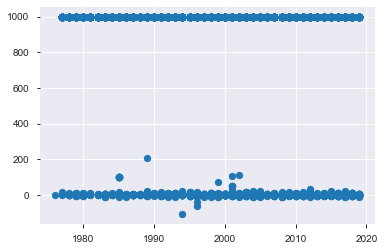

In [502]:
plt.scatter(train['yearofloss'], train['elevationdifference'])

In [501]:
#rerunning model without the amountpaidcontents (probably leakage)

target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim', 'amountpaidoncontentsclaim']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

((20482, 24), (8778, 24), (7316,))

In [505]:
#rerunning first graph without leakage
#lost 6%

alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=alphas, normalize=True )
    )

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.2935883454332558
Val score: 0.30248931311354177


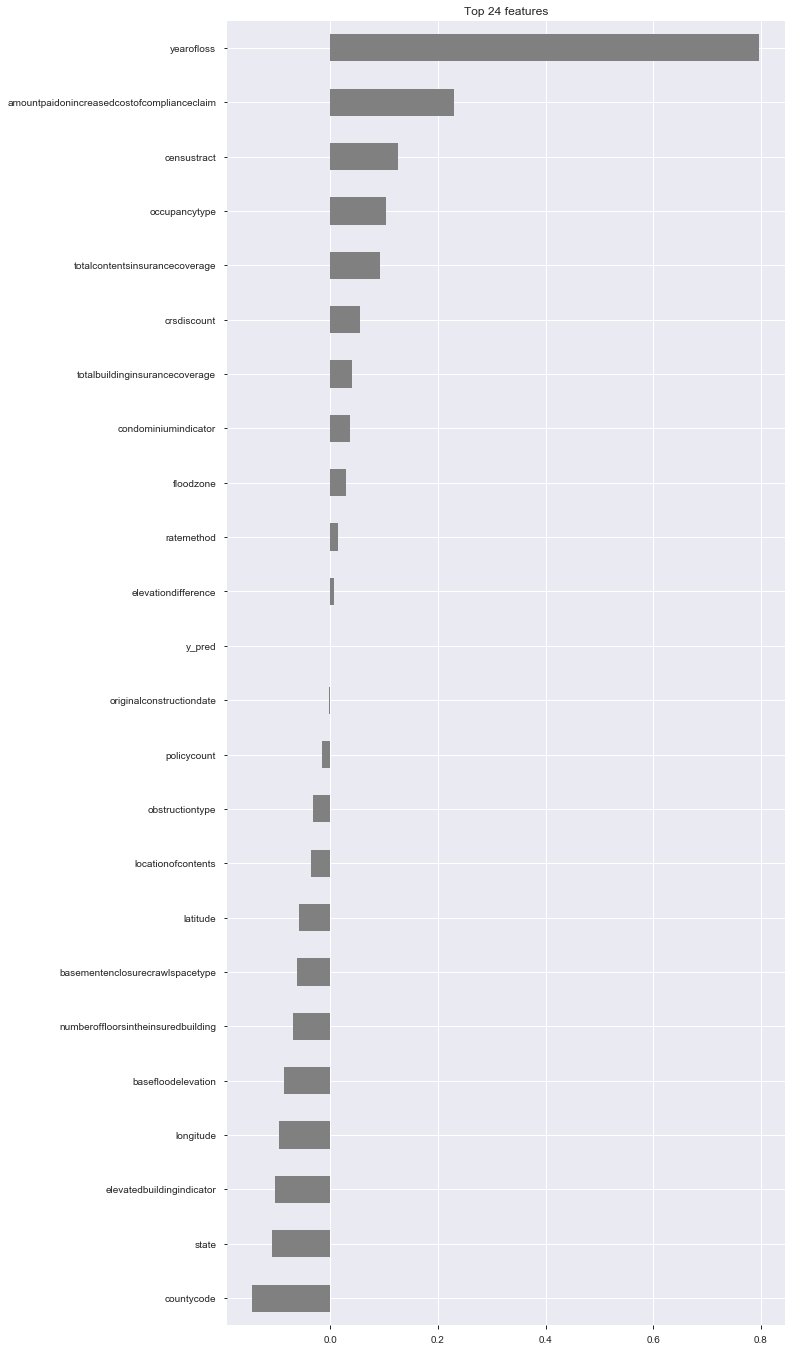

In [506]:
pipe = pipeline.named_steps['ridgecv'].coef_
importances = pd.Series(pipe, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,24))
plt.title(f'Top 24 features')
importances.sort_values()[-24:].plot.barh(color='grey')

In [507]:
#score decreased 11% with leakage removed

from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.9259971967115008
Val score: 0.4592602102685255


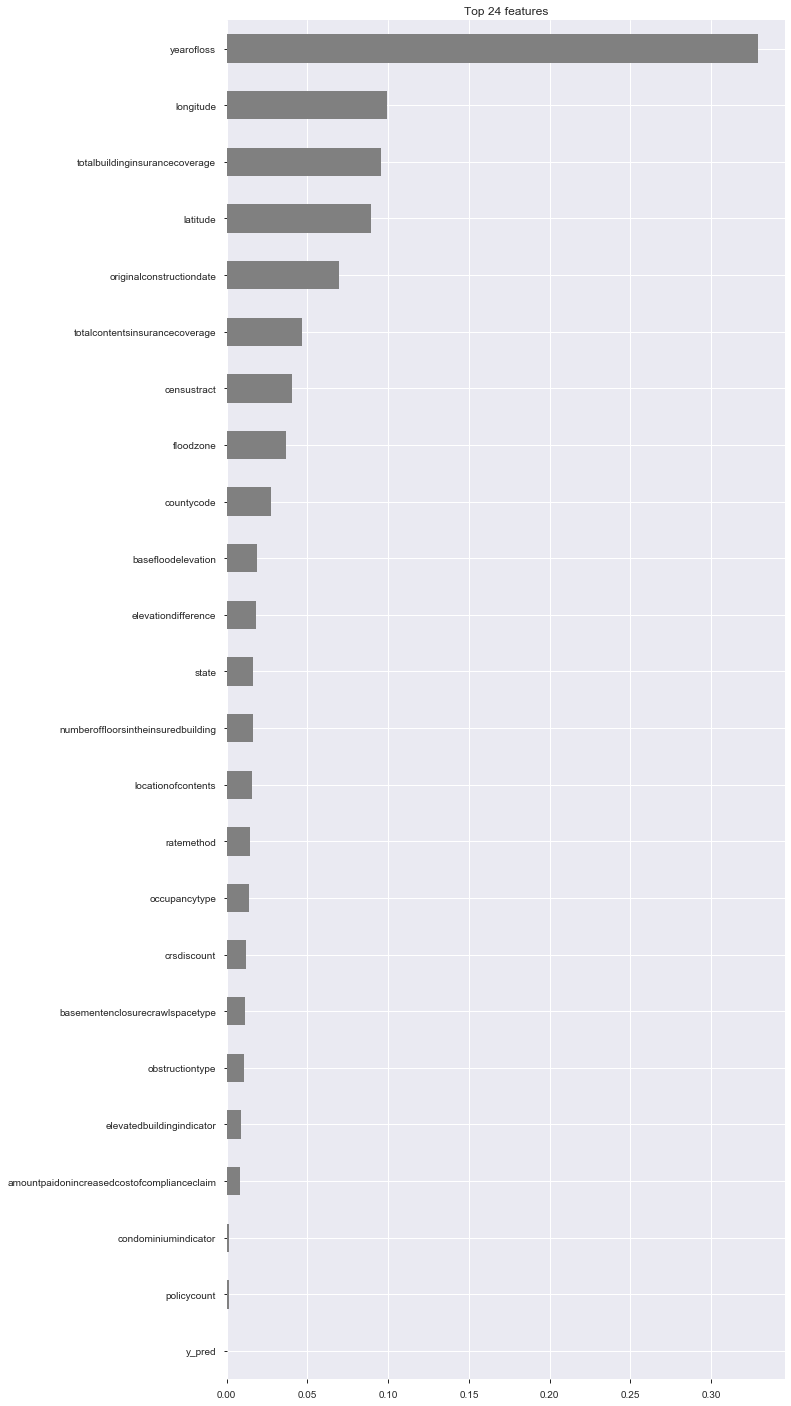

In [509]:
pipe = pipeline.named_steps['randomforestregressor']
importances = pd.Series(pipe.feature_importances_, X_train.columns)

plt.figure(figsize=(10,25))
plt.title(f'Top 24 features')
importances.sort_values()[-25:].plot.barh(color='grey')

In [ ]:
isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature = feature
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1e1132460c8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1e125691f48>})

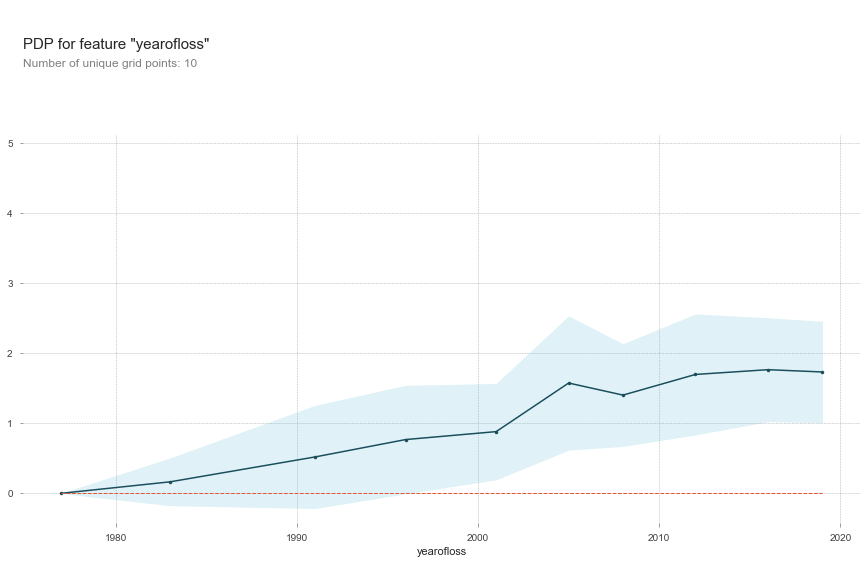

In [513]:
#I want to get a better look using partial dependence at our
#top importances 
from pdpbox.pdp import pdp_isolate, pdp_plot
plt.rcParams['figure.dpi'] = 72

feature= 'yearofloss'

isolated = pdp_isolate(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature = feature
)

pdp_plot(isolated, feature_name=feature)

In [ ]:
#I am quite excited to see that my hypothesis seems to be proving correct!
#beyond just the years with the really big storms,
#the importances of the year is steadily rising
#which means that the year is becoming increasingly more influencial as to whether or not
#it will flood. Which supports outside evidence of global warming. 

In [514]:
#can I engineer any new features to improve my score? before doing hyperparameter tuning

X_train.columns

Index(['basefloodelevation', 'basementenclosurecrawlspacetype',
       'condominiumindicator', 'policycount', 'countycode', 'crsdiscount',
       'elevatedbuildingindicator', 'elevationdifference', 'censustract',
       'floodzone', 'latitude', 'locationofcontents', 'longitude',
       'numberoffloorsintheinsuredbuilding', 'obstructiontype',
       'occupancytype', 'originalconstructiondate',
       'amountpaidonincreasedcostofcomplianceclaim', 'ratemethod', 'state',
       'totalbuildinginsurancecoverage', 'totalcontentsinsurancecoverage',
       'yearofloss', 'y_pred'],
      dtype='object')

In [ ]:
#ideas for feature engineering

#basefloodelevation 
#elevation at which there is a 1% chance per year of flooding in feet from the elevation

#floodzone
#different catagories of flooding risk

#elevatedbuildingindicator
#as it sounds

#elevation difference
#Difference in feet between the elevation of the lowest floor used for rating or the 
#floodproofed elevation and the base flood elevation

#amountpaidonincreasedcostofcomplianceclaim
#$ given after severe flooding to relocate, rebuild, or raise house

#maybe state and floodzone could be combined?
#or basefloodelevation and floodzone

In [541]:
#(difference in lowest floor from elevation with 1% chance of flooding) + 
#(elevation with 1% chance of flooding) 
#this will give a single number as the number of feet=1% chance of flooding

sclaims['heightawayfrom_flooding'] = sclaims['elevationdifference'] + sclaims['basefloodelevation']

In [544]:
train, test = train_test_split(sclaims, test_size= .2, random_state=42)
train, val = train_test_split(train, test_size= .3, random_state=42)
test.shape, train.shape, val.shape

((7316, 29), (20482, 29), (8778, 29))

In [549]:
target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim', 'amountpaidoncontentsclaim']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

((20482, 25), (8778, 25), (7316,))

In [550]:
#my score went up very slightly

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.9259249984380297
Val score: 0.4604349479174196


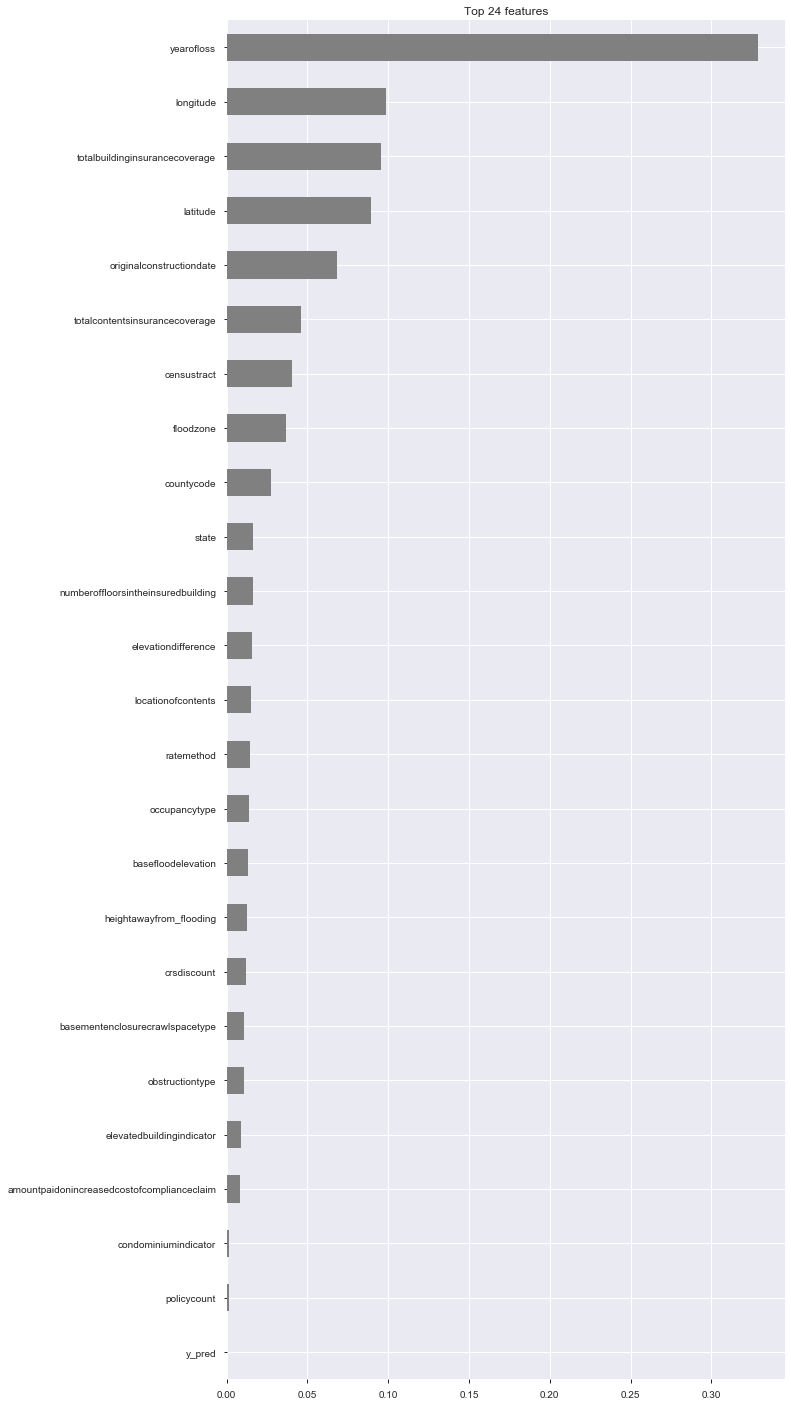

In [551]:
#lets see what little influence this new feature had
#17th on the list

pipe = pipeline.named_steps['randomforestregressor']
importances = pd.Series(pipe.feature_importances_, X_train.columns)

plt.figure(figsize=(10,25))
plt.title(f'Top 24 features')
importances.sort_values()[-25:].plot.barh(color='grey')

In [ ]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
)

pipeline.fit()

In [564]:
#will try cross validation
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42)
)


param_distributions = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
    'randomforestregressor__min_samples_leaf':[1, randint(2,10)],
    'randomforestregressor__n_estimators': randint(50, 500),
    'randomforestregressor__max_depth': [5, 10, 15, 20, None],
    'randomforestregressor__max_features': uniform(0, 1)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions= param_distributions,
    n_iter=20,
    cv = 3,
    scoring='neg_mean_absolute_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)


search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


TypeError: '<' not supported between instances of 'float' and 'rv_frozen'

In [562]:
X_train.dtypes

basefloodelevation                            float64
basementenclosurecrawlspacetype               float64
condominiumindicator                           object
policycount                                   float64
countycode                                    float64
crsdiscount                                   float64
elevatedbuildingindicator                      object
elevationdifference                           float64
censustract                                   float64
floodzone                                      object
latitude                                      float64
locationofcontents                             object
longitude                                     float64
numberoffloorsintheinsuredbuilding            float64
obstructiontype                                object
occupancytype                                 float64
originalconstructiondate                       object
amountpaidonincreasedcostofcomplianceclaim    float64
ratemethod                  